In [1]:
import logging
import sys
import datetime

from icecream import ic
from tqdm import tqdm

In [2]:

def time_now():
  
    return f"{datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')} |"
#.strftime('%Y-%m-%d %H:%M:%S')
ic.configureOutput(prefix=time_now)
ic.configureOutput(includeContext=True) 

https://github.com/jhljx/GKT 

https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/aggr/lstm.html

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt;
np.random.seed(42);

In [4]:
from sklearn.metrics import roc_auc_score;
from sklearn.metrics import classification_report;

In [5]:
pd.set_option('display.max_columns', None);

In [6]:
df=pd.read_pickle('appmath.pkl')[['graph_id', 'user_id', 
       'goal_id',
        'interaction_end_time',
       'learning_objective_name', 'atom_id', 
       'correct', 'time_spent_answering_s', 'time_spent_on_instruction_s',
       'goal_progress',
       'target_status_and_progress', 'prev_concept_narrative',
       'duration_s', 'is_target']]  

In [7]:
df2=pd.read_csv('prereq_edges.csv')

In [8]:
G=nx.Graph()

for _,i in df2.iterrows():    
       
        G.add_edge(i['source_lo_title'],i['dest_lo_title'])
        
subgraphs=[G.subgraph(i) for i in nx.connected_components(G)]

for num,sub in enumerate(subgraphs):
    
    nx.set_node_attributes(sub,num,'subGraphId')

nodeSubGraphId={}
for g in subgraphs:
    for node in g.nodes(data=True):
         nodeSubGraphId[node[0]]= node[1]['subGraphId']
            
subgraphsNodeCountDict={ num: g.number_of_nodes() for num,g in  enumerate(subgraphs)}

In [9]:
for col in df.columns:
    if df[col].dtype.name=='category':
        df[col]=df[col].astype(str)

https://colab.research.google.com/drive/1jDiuseAdtZCYbAX2IRv2HU8zG5585bRi?usp=sharing#scrollTo=GQ9SKdThF8Bq

https://anuradhawick.com/software-tools/

In [10]:
df['loGraphID']=df.learning_objective_name.apply(lambda x: nodeSubGraphId.get(x) )

In [11]:
difficulty=df[~df.correct.isna()].groupby('atom_id')['correct'].mean().reset_index().rename(columns={'correct':'difficulty'})

In [12]:
df=df.merge(difficulty,how='left',on='atom_id')

In [13]:
#loIndex={lo:i for i,lo in enumerate( df.learning_objective_name.unique())}
#df['loIndex']=df['learning_objective_name'].apply(lambda x: loIndex[x])

In [14]:
def atomClassifier(x):
    if x==None:
        return 'learningMaterial'
    else:
        return 'question'

In [15]:
df['atom_type']=df.correct.apply(lambda x:atomClassifier(x) )

In [16]:
df['correctBinary']=df.correct*1
df.atom_id=df.atom_id.astype(str)


In [17]:
df2['graph_id']=df2.apply(lambda x: nodeSubGraphId.get(x['source_lo_title']) if nodeSubGraphId.get(x['source_lo_title'])!=None else nodeSubGraphId.get(x['dest_lo_title']),axis=1)

In [18]:
unique_lo_graph_id_dic={}
for i in df2.graph_id.unique():
    unique_lo=np.unique(np.concatenate((df2[df2.graph_id==i]['source_lo_title'].unique(),((df2[df2.graph_id==i]['dest_lo_title'].unique())))))
    unique_lo_graph_id_dic[i]={ item:int(num)  for  num,item in enumerate(unique_lo)}
    df2.loc[df2.graph_id==i,'source_index' ]=df2.apply(lambda x: unique_lo_graph_id_dic.get(i).get(x['source_lo_title']),axis=1)
    df2.loc[df2.graph_id==i,'dest_index' ]=df2.apply(lambda x: unique_lo_graph_id_dic.get(i).get(x['dest_lo_title']),axis=1)

In [19]:
df2.source_index=df2.source_index.astype(int)
df2.dest_index=df2.dest_index.astype(int)

In [20]:
df=df[~df.loGraphID.isna()]

In [21]:
df['loIndex']=df.apply(lambda x: unique_lo_graph_id_dic[x['loGraphID']].get(x['learning_objective_name'] ),axis=1)

In [22]:
df2[df2.graph_id==3].max()

source_lo_id                    eda7ab6a-8070-4fd8-8387-da17a40fd99e
dest_lo_id                      eda7ab6a-8070-4fd8-8387-da17a40fd99e
source_lo_title    Write biconditional statements in symbolic for...
dest_lo_title      Write biconditional statements in symbolic for...
graph_id                                                           3
source_index                                                      30
dest_index                                                        30
dtype: object

In [23]:
loGraphID=26

In [24]:
loEdgeMapping=df2[df2['graph_id']==loGraphID][['source_index','dest_index']]
loEdgeIndex=loEdgeMapping.values.transpose()

In [25]:
from torch_geometric.data import HeteroData
import torch 


In [26]:
import torch_geometric.transforms as T

usersGraphDataList=[]
min_atom_count=5
max_atom_count=500
for user in tqdm(users): 
    try:
        user_atom_count=df[(df.loGraphID==loGraphID) & (df.user_id==user) & (df.atom_type=='question')].shape[0]
        if user_atom_count>min_atom_count and user_atom_count<=max_atom_count:
            features, edges,target =user_dataset(df,df2,user,loGraphID )
            data=generate_data(features, edges,target)
            usersGraphDataList.append(data)
    except:
        pass
    

In [826]:
import torch_geometric as pyg
from torch_geometric.nn import GCNConv 
from torch_geometric.nn import SAGEConv, to_hetero ,LSTMAggregation
import  torch.nn as nn
import torch.nn.functional as F
import torch 
from torch_geometric.loader import DataLoader

ERROR! Session/line number was not unique in database. History logging moved to new session 1834


In [29]:
class GNN(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels,requires_grad=False)
        self.actfn1=nn.ReLU()
        
        self.conv2 = SAGEConv((-1, -1), hidden_channels,requires_grad=False)
        self.actfn2=nn.ReLU()
        
        self.conv3 = SAGEConv((-1, -1), hidden_channels,requires_grad=False)
        self.actfn3=nn.ReLU()
        
        self.linear=nn.Linear(hidden_channels,hidden_channels)
        
        #self.lstm = nn.LSTM(input_size=hidden_channels, hidden_size=50,num_layers=1, batch_first=True)
        
        self.out=nn.Linear(hidden_channels,out_channels)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x, edge_index):
        # First Message Passing layer
        x = self.actfn1(self.conv1(x, edge_index))
        x= F.dropout(x,p=.1,training=self.training)
        
        # Second Message Passing layer
        x = self.actfn2(self.conv2(x, edge_index))
        x= F.dropout(x,p=.1,training=self.training)
        
        # Third Message Passing layer  
        #x = self.actfn3(self.conv3(x, edge_index))
        #x= F.dropout(x,p=.25,training=self.training)
        x = self.linear(x)
        #x, _ = self.lstm(x)
       
        
        # Out layer
        x=self.sigmoid( self.out(x))
        
        return x


#model_1 = GNN(hidden_channels=64, out_channels=2)
#model_1 = to_hetero(model_1, data.metadata(), aggr='sum')

In [30]:
usersGraphDataList
def batch_generator(usersGraphDataList):
    
    np.random.shuffle(usersGraphDataList)
    test_size=int(len(usersGraphDataList)*.2)
    test_data=usersGraphDataList[:test_size]
    train_data=usersGraphDataList[test_size:]
    
    return test_data,train_data
    

model_1 = GNN(hidden_channels=200, out_channels=2)
model_1 = to_hetero(model_1, data.metadata(), aggr='mean')


#model_2 = GAT(hidden_channels=100, out_channels=2)
#model_2 = to_hetero(model_2, data.metadata(), aggr='mean')


model=model_1
#dataLoader=list(DataLoader(usersGraphDataList,batch_size=80))
test_data,train_data=batch_generator(usersGraphDataList)
learning_rate=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion=torch.nn.CrossEntropyLoss()
train_acc_mean_list=[]
test_acc_mean_list=[]
loss_list=[]
best_score=0

start_training=True
if start_training:
    for epcoh in range(7):
        train_acc_list=[]
        test_acc_list=[]
        loss_list=[]
        for num, data in enumerate(tqdm(train_data)):
            model.train()
            optimizer.zero_grad()
            #data.x = torch.from_numpy(data.x_dict)
            #data.edge_index = torch.from_numpy(data.edge_index_dict)
            out=model(data.x_dict, data.edge_index_dict)  # model1
            #out = model(data.x, data.edge_index)
            #BCELoss -> loss=criterion(out['atom'][data['atom'].train_mask].argmax(dim=1).float().requires_grad_(True),data['atom'].y[data['atom'].train_mask].float())
            #loss=criterion(out['atom'][data['atom'].train_mask].argmax(dim=1).float().requires_grad_(True),data['atom'].y[data['atom'].train_mask].float())
            loss=criterion(out['atom'],data['atom'].y)
            #loss=criterion(out['atom'].argmax(dim=1).float().requires_grad_(True),data['atom'].y.float())
            loss.backward()

            optimizer.step()
            pred=out['atom'].argmax(dim=1)
            train_correct=pred==data['atom'].y
            train_acc=int(train_correct.sum())/data['atom'].y.shape[0]
            train_acc_list.append(train_acc)



        #test_acc_mean_list.append(np.mean(test_acc_list))
            if epcoh==0 and num ==0:
                best_score=loss
            elif best_score<loss:
                best_score=loss
                best_model = model
            loss_list.append(loss.item())
        model.eval()
        model_performance='epoch : {} , loss :{:.4f} , accuracy : {:.4f} \n'.format(epcoh+1,np.mean(loss_list),np.mean(train_acc_list))
        ic(model_performance);



In [31]:
#user_dataset(df,df2,'0012ff2b-871a-45d6-8e33-804f7464fa0a',3 )
df.columns

Index(['graph_id', 'user_id', 'goal_id', 'interaction_end_time',
       'learning_objective_name', 'atom_id', 'correct',
       'time_spent_answering_s', 'time_spent_on_instruction_s',
       'goal_progress', 'target_status_and_progress', 'prev_concept_narrative',
       'duration_s', 'is_target', 'loGraphID', 'difficulty', 'atom_type',
       'correctBinary', 'loIndex'],
      dtype='object')

In [32]:
dft=df[(df.loGraphID==loGraphID)]

In [33]:
#dft.groupby('user_id')['atom_id'].count()

In [693]:
dft.groupby('user_id')['atom_id'].count().sort_values()[20:50].index.to_list()

['4fb849d4-3798-4524-a93a-fe7b56cfb90a',
 'b660a384-1ca7-4cd8-9811-e2d3aedc378c',
 'e1000e42-ffd1-4782-9f14-aa75ce6a8b0e',
 '37907049-c931-4ce8-82a8-94b6cd2c1dbd',
 'f7086166-753c-4867-af57-0e2b82fe3cbf',
 'e4ac6b18-5423-4886-b7ee-a8fd2c54ca9f',
 '9c40062e-0719-4f9b-9d6a-bca4d37a2ce5',
 'e3bce254-2394-46f3-9053-8437e5b810a4',
 '3eb9212c-523a-49fb-a670-3a51ae1ff87e',
 '1014fea4-cd45-4b59-b903-4c59a4360fcb',
 'bbc510e7-6659-4092-bde3-96d10fa0e7e0',
 '92a51cf7-0396-4751-8ac0-7e2ec2b4f02f',
 '7e0f991c-23b3-49bb-bcc5-38c26263bf4b',
 'efb10a25-84d0-4e96-bd3d-762b24f1b0a1',
 'ab380c7a-306e-4f3e-adf6-425bf2833a84',
 'ef963abb-beda-4105-b142-72b6d0ca8b6f',
 'c7e39c9c-39dc-42bd-a4ee-c622edecf3c9',
 '8259fae9-a618-46b6-a95a-380a41812f7b',
 '81f01061-9f19-4a2e-90b2-04c95bae81f2',
 '1c991ad0-89aa-4aa9-94b9-fea443b609bc',
 'eb073db0-f433-4711-bb9f-c2941aca5273',
 'ba36b8f6-e67d-4931-8149-2a2a5b78c101',
 '822068ff-5469-4321-b03c-b616645a4bb1',
 '905c2238-1c04-4c4a-b782-bccb21f5f967',
 'dd102d86-6cb2-

In [708]:
user_t=dft.groupby('user_id')['atom_id'].count().sort_values()[20:70].index.to_list()

In [709]:
df_tu=dft[dft.user_id.isin(user_t)].sort_values(['user_id','interaction_end_time']).reset_index(drop=True)

In [715]:
df_tu_list=[]
question_count=0
for row_id,row in df_tu.iterrows():
    if row_id==0:
        user_id=row['user_id']
    if row_id>0:
        if user_id != row['user_id']:
            question_count=0
            user_id=row['user_id']
    if row['atom_type'] =='question':
        question_count =question_count+1
        if question_count>2:
            df_tu_list.append(df_tu.iloc[:row_id+1])

In [717]:
len(df_tu_list)

1431

In [718]:
def user_dataset_with_target_node(userDf,df2,user,goal,loEdgeIndex):
    
    '''
    df - df should be filtered by goal id
    
    edges
    -------
    lo -> atom
    atom -> atom
    lo -> learning materials (lm)
    atom -> lm
    lm -> atom
    lm -> lm
    lm/atom -> target
    
    node / features
    ---------------
    
    lo - radnom number
    atom - dificulty ,  correctness
    lm - time spend 
    '''
    userDf.loc[userDf.shape[0]-1,'atom_type']='target'
    
    atomIndex=np.arange(userDf[userDf.atom_type=='question'].atom_id.shape[0])
    lmIndex=np.arange(userDf[userDf.atom_type=='learningMaterial'].atom_id.shape[0])
    
    # assisgning questions and learningMaterials index seperatly in sinlge columns 'atom_index'
    userDf.loc[userDf.atom_type=='question','atomIndex']=atomIndex
    userDf.loc[userDf.atom_type=='learningMaterial','atomIndex']=lmIndex
    userDf.loc[userDf.atom_type=='target','atomIndex']=0
    
    #lo-atom
    loAtomEdgeIndex=userDf[userDf.atom_type=='question'][['loIndex','atomIndex']].values.transpose()
    #lo-lm
    loLmEdgeIndex=userDf[userDf.atom_type=='learningMaterial'][['loIndex','atomIndex']].values.transpose()
    #lo-target
    loTargetEdgeIndex=userDf[userDf.atom_type=='target'][['loIndex','atomIndex']].values.transpose()
    
    userDf['atom_type_shift']=userDf.atom_type.shift(-1)
    userDf['atomIndex_shift']=userDf.atomIndex.shift(-1)
    
    featuresDict={}
    #atom features
    atomFeatures = userDf[userDf.atom_type=='question'][['difficulty','correctBinary']].astype(float).to_numpy()
    featuresDict['atom']=atomFeatures
    #learning materials features
    #lmFeatures = userDf[userDf.atom_type=='learningMaterial'][['duration_s']].to_numpy()
    
    if  lmIndex.size>0 :
            lmFeatures = userDf[userDf.atom_type=='learningMaterial'][['duration_s']].to_numpy()
            featuresDict['lm']=lmFeatures
            
    #learning objectives
    loFeatures=np.ones(loEdgeIndex.max()+1).reshape(-1,1)
    featuresDict['lo']=loFeatures
    
    #target features
    targetFeatures = userDf[userDf.atom_type=='target'][['difficulty']].to_numpy()
    featuresDict['target']=targetFeatures
    targetCorrectness=userDf[userDf.atom_type=='target'][['correctBinary']].astype(float).to_numpy()
    
    userDf_shift= userDf[~userDf.atomIndex_shift.isna()].copy() 

    edgesDict={}
    #atom-atom
    atomEdgeIndex=userDf_shift[(userDf_shift.atom_type=='question') & (userDf_shift.atom_type_shift=='question')][['atomIndex','atomIndex_shift']].values.transpose()
    if atomEdgeIndex.size >0:
        edgesDict['atom']=atomEdgeIndex
    #atom-lmatomLmEdgeIndex
    atomLmEdgeIndex=userDf_shift[(userDf_shift.atom_type=='question') & (userDf_shift.atom_type_shift=='learningMaterial')][['atomIndex','atomIndex_shift']].values.transpose()
    if atomLmEdgeIndex.size>0:
        edgesDict['atom_lm']=atomLmEdgeIndex
    #lm-atom
    LmAtomEdgeIndex=userDf_shift[(userDf_shift.atom_type=='learningMaterial') & (userDf_shift.atom_type_shift=='question')][['atomIndex','atomIndex_shift']].values.transpose()
    if LmAtomEdgeIndex.size>0:
        edgesDict['lm_atom']=LmAtomEdgeIndex
    #lm-lm
    LmLmEdgeIndex=userDf_shift[(userDf_shift.atom_type=='learningMaterial') & (userDf_shift.atom_type_shift=='learningMaterial')][['atomIndex','atomIndex_shift']].values.transpose()
    if LmLmEdgeIndex.size>0:
        edgesDict['lm_lm']=LmLmEdgeIndex
    
    #lm-target
    LmTargetEdgeIndex=userDf_shift[(userDf_shift.atom_type=='learningMaterial') & (userDf_shift.atom_type_shift=='target')][['atomIndex','atomIndex_shift']].values.transpose()
    if LmTargetEdgeIndex.size>0:
        edgesDict['lm_target']=LmTargetEdgeIndex
    
    #atom-target
    atomTargetEdgeIndex=userDf_shift[(userDf_shift.atom_type=='question') & (userDf_shift.atom_type_shift=='target')][['atomIndex','atomIndex_shift']].values.transpose()
    
    edgesDict['atom_target']=atomTargetEdgeIndex

    if  loLmEdgeIndex.size>0:
        edgesDict['lo_lm']=loLmEdgeIndex

    if  loAtomEdgeIndex.size>0:
        edgesDict['lo_atom']=loAtomEdgeIndex
    
    edgesDict['lo_target']=loTargetEdgeIndex
    edgesDict['lo']=loEdgeIndex
    return featuresDict,edgesDict,targetCorrectness,userDf

In [719]:
def preprocess(df,df2,user,goal):
        loEdgeMapping=df2[df2['graph_id']==goal][['source_index','dest_index']]
        loEdgeIndex=loEdgeMapping.values.transpose()
      
        featuresDict,edgesDict,targetCorrectness,userDf=user_dataset_with_target_node(df,df2,user,goal,loEdgeIndex)
        
        return featuresDict,edgesDict,targetCorrectness,userDf
    
            

In [803]:
def generate_data_with_target(features,edges,targetCorrectness):  
    data = HeteroData()
    #node features
    data['atom'].x=torch.tensor(features['atom'].astype(np.float64)).float()
    data['lo'].x= torch.tensor(features['lo']).float()
    data['target'].x= torch.tensor(features['target']).float()
    
    #edge index
    data['lo','lo_atom','atom'].edge_index=torch.from_numpy(edges['lo_atom']).long()
    data['lo','lo_lo','lo'].edge_index= torch.from_numpy(edges['lo']).long()
    data['lo','lo_target','target'].edge_index=torch.from_numpy(edges['lo_target']).long()
    data['atom','atom_atom','atom'].edge_index=torch.from_numpy(edges['atom']).long()
    data['atom','atom_target','target'].edge_index=torch.from_numpy(edges['atom_target']).long()
    
    
    
    #lm edges and features
    if 'lm' in features:
        data['lm'].x= torch.tensor(features['lm']).float()
        data['lo','lo_lm','lm'].edge_index=torch.from_numpy(edges['lo_lm']).long()
        
    if 'lm_lm' in features:    
        data['lm','lm_lm','lm'].edge_index=torch.from_numpy(edges['lm_lm']).long()
    
    if 'atom_lm' in features:
        data['atom','atom_lm','lm'].edge_index=torch.from_numpy(edges['atom_lm']).long()
    
    if 'lm_atom' in features:
        data['lm','atom_lm','atom'].edge_index=torch.from_numpy(edges['lm_atom']).long()
    
    data['target'].y=torch.from_numpy(targetCorrectness).long()

    #train_mask = torch.ones(attom_count, dtype=torch.bool)
    #train_mask[target_atom] = False
    #data['atom'].train_mask = train_mask

    #normalize=T.NormalizeFeatures()
    #data=normalize(data)
    return data

In [804]:
def data_batch_generator(df_tu_list):
    data_list=[]
    for i in tqdm(range(len(df_tu_list))):
        featuresDict,edgesDict,targetCorrectness,userDf=preprocess(df_tu_list[i].copy(),df2,user_t,loGraphID) 
        data=generate_data_with_target(featuresDict,edgesDict,targetCorrectness)
        data_list.append(data)
    return data_list

In [989]:
loGraphID=3

In [990]:
dft=df[(df.loGraphID==loGraphID)]

In [991]:
dft.groupby('user_id')['atom_id'].count().sort_values()[25:40]#.index.to_list()

user_id
e4ac6b18-5423-4886-b7ee-a8fd2c54ca9f    23
9c40062e-0719-4f9b-9d6a-bca4d37a2ce5    23
e3bce254-2394-46f3-9053-8437e5b810a4    24
3eb9212c-523a-49fb-a670-3a51ae1ff87e    25
1014fea4-cd45-4b59-b903-4c59a4360fcb    26
bbc510e7-6659-4092-bde3-96d10fa0e7e0    26
92a51cf7-0396-4751-8ac0-7e2ec2b4f02f    27
7e0f991c-23b3-49bb-bcc5-38c26263bf4b    27
efb10a25-84d0-4e96-bd3d-762b24f1b0a1    28
ab380c7a-306e-4f3e-adf6-425bf2833a84    29
ef963abb-beda-4105-b142-72b6d0ca8b6f    29
c7e39c9c-39dc-42bd-a4ee-c622edecf3c9    32
8259fae9-a618-46b6-a95a-380a41812f7b    34
81f01061-9f19-4a2e-90b2-04c95bae81f2    34
1c991ad0-89aa-4aa9-94b9-fea443b609bc    35
Name: atom_id, dtype: int64

In [992]:
user_t=dft.groupby('user_id')['atom_id'].count().sort_values()[25:50].index.to_list()

In [1011]:
dft.groupby('user_id')['atom_id'].count().sort_values()[25:50]

user_id
e4ac6b18-5423-4886-b7ee-a8fd2c54ca9f    23
9c40062e-0719-4f9b-9d6a-bca4d37a2ce5    23
e3bce254-2394-46f3-9053-8437e5b810a4    24
3eb9212c-523a-49fb-a670-3a51ae1ff87e    25
1014fea4-cd45-4b59-b903-4c59a4360fcb    26
bbc510e7-6659-4092-bde3-96d10fa0e7e0    26
92a51cf7-0396-4751-8ac0-7e2ec2b4f02f    27
7e0f991c-23b3-49bb-bcc5-38c26263bf4b    27
efb10a25-84d0-4e96-bd3d-762b24f1b0a1    28
ab380c7a-306e-4f3e-adf6-425bf2833a84    29
ef963abb-beda-4105-b142-72b6d0ca8b6f    29
c7e39c9c-39dc-42bd-a4ee-c622edecf3c9    32
8259fae9-a618-46b6-a95a-380a41812f7b    34
81f01061-9f19-4a2e-90b2-04c95bae81f2    34
1c991ad0-89aa-4aa9-94b9-fea443b609bc    35
eb073db0-f433-4711-bb9f-c2941aca5273    36
ba36b8f6-e67d-4931-8149-2a2a5b78c101    36
822068ff-5469-4321-b03c-b616645a4bb1    36
905c2238-1c04-4c4a-b782-bccb21f5f967    37
dd102d86-6cb2-4684-bf5b-e0673381562d    38
d744d19c-13fd-488a-a7dc-fca89ea3614a    38
7e574580-9081-4266-b59c-089ffc570e8e    39
8e65ec8f-18eb-4546-85f2-5698aea5e4f1    39
f5c

In [993]:
df_tu=dft[dft.user_id.isin(user_t)].sort_values('interaction_end_time').reset_index(drop=True)

In [994]:
df_tu_list=[]
question_count=0
for row_id,row in df_tu.iterrows():
    if row_id==0:
        user_id=row['user_id']
    if row_id>0:
        if user_id != row['user_id']:
            question_count=0
            user_id=row['user_id']
    if row['atom_type'] =='question':
        question_count =question_count+1
        if question_count>2:
            df_tu_list.append(df_tu.iloc[:row_id+1])

In [995]:
data_list=data_batch_generator(df_tu_list)

100%|████████████████████████████████████████████████████████████████████████████████| 513/513 [00:53<00:00,  9.59it/s]


In [996]:
len(data_list)

513

In [997]:
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [998]:
from torch_geometric.nn import GATConv, Linear, to_hetero

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GATConv((-1, -1), hidden_channels, add_self_loops=False)
        self.lin1 = Linear(-1, hidden_channels)
        
        
        
        self.conv2 = GATConv((-1, -1), out_channels, add_self_loops=False)
        self.lin2 = Linear(-1, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index) + self.lin1(x)
        x = x.relu()
        
        x = self.conv2(x, edge_index) + self.lin2(x)
        x=x.sigmoid()
        
        return x

#
#model_2 = GAT(hidden_channels=64, out_channels=2)
#model_2 = to_hetero(model_2, data.metadata(), aggr='mean')

In [999]:
from torch_geometric.nn import GCNConv

In [1000]:
data_list[-1]

HeteroData(
  atom={ x=[628, 2] },
  lo={ x=[31, 1] },
  target={
    x=[1, 1],
    y=[1, 1]
  },
  lm={ x=[176, 1] },
  (lo, lo_atom, atom)={ edge_index=[2, 628] },
  (lo, lo_lo, lo)={ edge_index=[2, 41] },
  (lo, lo_target, target)={ edge_index=[2, 1] },
  (atom, atom_atom, atom)={ edge_index=[2, 475] },
  (atom, atom_target, target)={ edge_index=[2, 1] },
  (lo, lo_lm, lm)={ edge_index=[2, 176] }
)

import torch_geometric.transforms as T
from torch_geometric.datasets import OGB_MAG
from torch_geometric.nn import HeteroConv, GCNConv, SAGEConv, GATConv, Linear



class HeteroGNN(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels, num_layers):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = HeteroConv({
                ('lo', 'lo_lo', 'lo'): GCNConv(-1, hidden_channels),
                ('atom', 'atom_atom', 'atom'): GCNConv(-1, hidden_channels),
                ('atom', 'atom_target', 'target'): GCNConv(-1,  hidden_channels,add_self_loops=True),
                ('lo', 'lo_atom', 'atom'): GCNConv(-1,  hidden_channels,add_self_loops=True),
            }, aggr='sum')
            self.convs.append(conv)

        self.lin = Linear(hidden_channels, out_channels)

    def forward(self, x_dict, edge_index_dict):
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
            x_dict = {key: x.relu() for key, x in x_dict.items()}
        return self.lin(x_dict['target'])

model = HeteroGNN(hidden_channels=64, out_channels=2, num_layers=2)

In [1006]:
 len(data_list)

513

In [1013]:
from torch_geometric.data import DataLoader

In [1088]:
list(np.random.choice([1,2],5,replace=True))

[2, 1, 2, 2, 2]

In [1097]:
target_class_1=[]
target_class_0=[]
for num, data in enumerate(data_list):
    target_class=data['target'].y.item()
    if target_class ==0:
        target_class_0.append(data)
    else:
        target_class_1.append(data)
        
if len(target_class_1)>len(target_class_0):
        target_class_0_balanced=[]
        index_list=np.arange(len(target_class_0))
        index_balanced=list(np.random.choice(index_list,len(target_class_1),replace=True))
        for i in index_balanced:
            target_class_0_balanced.append(target_class_0[i])
target_class_1.extend(target_class_0_balanced)

In [1099]:
taget_balanced=target_class_1.copy()

In [ ]:
loader_classes=[]
for num, data in enumerate(taget_balanced):
    loader_classes.append(data['target'].y.view(1,-1)[0].numpy())
loader_classes_np=np.concatenate(loader_classes)
np.mean(loader_classes_np)

In [1145]:
from torch.nn import init

In [1192]:
hidden_channels=15
out_channels=2
class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels,requires_grad=True)
        self.actfn1=nn.Tanh()
        
        self.conv2 = SAGEConv((-1, -1), int(hidden_channels/5),requires_grad=True)
        self.actfn2=nn.Tanh()
        
        self.conv3 = SAGEConv((-1, -1), hidden_channels,requires_grad=True)
        self.actfn3=nn.Sigmoid()
        
        
        
        self.out=nn.Linear(int(hidden_channels/5),out_channels)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x, edge_index):
        
        # First Message Passing layer
        x = self.actfn1(self.conv1(x, edge_index))
        x= F.dropout(x,p=.7,training=self.training)
        
        x = self.actfn2(self.conv2(x, edge_index))
        x= F.dropout(x,p=.7,training=self.training)
        
        #x = self.actfn3(self.conv3(x, edge_index))
        #x= F.dropout(x,p=.7,training=self.training)
        #pool={key: gmp(batch[key].x, batch[key].batch) for key in batch.node_types}
        out=self.sigmoid(self.out(x))
        #out=self.out(x)
        return out,x


#model_1 = GNN(hidden_channels=64, out_channels=2)
#model_1 = to_hetero(model_1, data.metadata(), aggr='sum')

In [1200]:
NUM_GRAPHS_PER_BATCH=15
data_size=int(len(taget_balanced)*.80)
loader = DataLoader(taget_balanced[:data_size], 
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(taget_balanced[data_size:], 
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [1207]:
#model = GNN(hidden_channels=200, out_channels=2)
#model = to_hetero(model, data_list[-1].metadata())

model=GNN()
model = to_hetero(model, batch.metadata())
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,weight_decay=5e-12)
criterion=torch.nn.CrossEntropyLoss()
#criterion=F.binary_cross_entropy
train_acc_mean_list=[]
test_acc_mean_list=[]
loss_list=[]
accuracy_list=[]
best_score=0

train_size=int(len(data_list)*.8)
train_data=data_list[:train_size]
test_data=data_list[train_size:]



for epoch_num in range(10):
    epoch_accuracy=[]
    
    for  batch_num,batch in enumerate(loader):
        model.train()
        optimizer.zero_grad()   
        #x_dict = {key: gmp(batch[key].x, batch[key].batch) for key in batch.node_types}
        out,embedding=model(batch.x_dict, batch.edge_index_dict) 
        loss=criterion(out['target'],batch['target'].y.view(1,-1)[0])
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
        train_correct=out['target'].argmax(dim=1)==batch['target'].y.view(1,-1)[0]
        train_acc=train_correct*1
        accuracy=(sum(train_correct*1)/train_correct.shape[0]).item()
        epoch_accuracy.append(accuracy)
        accuracy_list.append(accuracy)
    if epoch_num==0:
        best_model=model
        best_loss=loss
    else:
        if loss<best_loss:
            best_model=model  
            best_loss=loss
    ic((epoch_num,np.mean(epoch_accuracy),loss.item()))
    

#out['target']: tensor([[0.2217, 0.0272]], grad_fn=<AddmmBackward0>)

2023-10-18 17:19:10 |4040510732.py:46 in <module>
                     (epoch_num,np.mean(epoch_accuracy),loss.item()): (0, 0.5767676934148326, 0.6188055276870728)
2023-10-18 17:19:14 |4040510732.py:46 in <module>
                     (epoch_num,np.mean(epoch_accuracy),loss.item()): (1, 0.6141414290124719, 0.8506262898445129)
2023-10-18 17:19:17 |4040510732.py:46 in <module>
                     (epoch_num,np.mean(epoch_accuracy),loss.item()): (2, 0.6191919319557421, 0.6666725873947144)
2023-10-18 17:19:20 |4040510732.py:46 in <module>
                     (epoch_num,np.mean(epoch_accuracy),loss.item()): (3, 0.6404040573221265, 0.46271491050720215)
2023-10-18 17:19:23 |4040510732.py:46 in <module>
                     (epoch_num,np.mean(epoch_accuracy),loss.item()): (4, 0.6156565845012665, 0.84891277551651)
2023-10-18 17:19:25 |4040510732.py:46 in <module>
                     (epoch_num,np.mean(epoch_accuracy),loss.item()): (5, 0.6287878959467916, 0.4919041395187378)
2023-10-18 17:19:

In [1208]:
loss_moving_avg=[]
mvg_steps=50
for i in range(len(loss_list)-mvg_steps):
    loss_moving_avg.append(np.mean(loss_list[i:i+mvg_steps]))

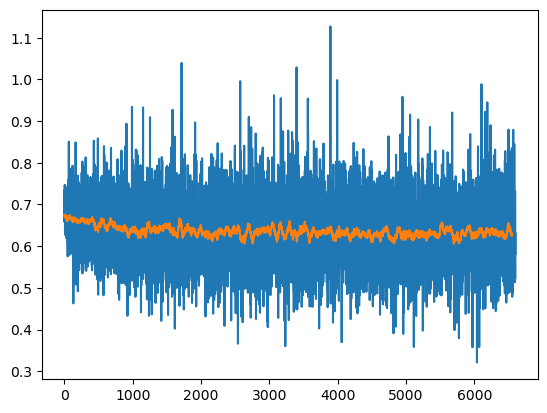

In [1209]:
plt.plot(loss_list)
plt.plot(loss_moving_avg)

In [1210]:
acc_moving_avg=[]

for i in range(len(accuracy_list)-mvg_steps):
    acc_moving_avg.append(np.mean(accuracy_list[i:i+mvg_steps]))

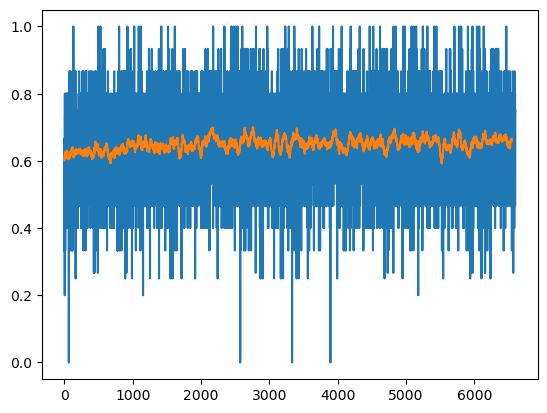

In [1211]:
plt.plot(accuracy_list)
plt.plot(acc_moving_avg)

In [1206]:
test_accuracy=[]
baseline_accuracy_list=[]
best_model.eval()
model.eval()
with torch.no_grad():
    for num, data in enumerate(test_loader):

        try:
            
            out,x=best_model(data.x_dict, data.edge_index_dict)
            pred=out['target'].argmax(dim=1)
            test_correct=out['target'].argmax(dim=1)==data['target'].y.view(1,-1)[0]
            test_acc=test_correct*1
            accuracy=(sum(test_correct*1)/test_correct.shape[0]).item()
            #baseline_accuracy=(data['target'].y.view(1,-1)[0].max()==out['target'].argmax(dim=1)).sum()/data['target'].y.view(1,-1)[0].shape[0]
            baseline_accuracy=((1==out['target'].argmax(dim=1))*1).sum()/data['target'].y.view(1,-1)[0].shape[0]
            performance='model :{:.2f} , basline :{:.2f}'.format(accuracy,baseline_accuracy)
            test_accuracy.append(accuracy)
            baseline_accuracy_list.append(baseline_accuracy.item())
            ic(performance);
        except Exception as e:
            ic(e)
            pass
ic(np.mean(test_accuracy),np.mean(baseline_accuracy_list));

2023-10-18 16:10:52 |1290665483.py:20 in <module>
                     performance: 'model :0.27 , basline :0.73'
2023-10-18 16:10:52 |1290665483.py:20 in <module>
                     performance: 'model :0.60 , basline :0.40'
2023-10-18 16:10:52 |1290665483.py:20 in <module>
                     performance: 'model :0.67 , basline :0.33'
2023-10-18 16:10:52 |1290665483.py:20 in <module>
                     performance: 'model :0.47 , basline :0.53'
2023-10-18 16:10:52 |1290665483.py:20 in <module>
                     performance: 'model :0.47 , basline :0.53'
2023-10-18 16:10:53 |1290665483.py:20 in <module>
                     performance: 'model :0.47 , basline :0.53'
2023-10-18 16:10:53 |1290665483.py:20 in <module>
                     performance: 'model :0.53 , basline :0.47'
2023-10-18 16:10:53 |1290665483.py:20 in <module>
                     performance: 'model :0.40 , basline :0.60'
2023-10-18 16:10:53 |1290665483.py:20 in <module>
                     performance: 'mod

In [1039]:
out['target'].argmax(dim=1)==1

tensor([True, True, True])

In [1244]:
out['target'].detach()

tensor([[0.0655, 0.5614],
        [0.0098, 0.9887],
        [0.0438, 0.9861],
        [0.0655, 0.5614]])

tensor([0.5614, 0.9887, 0.9861, 0.5614])

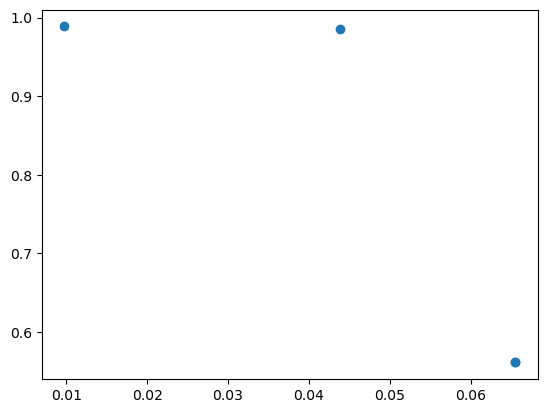

In [1248]:
plt.scatter(x=out['target'].detach()[:,0],y=out['target'].detach()[:,1])

In [964]:
hidden_channels=200
out_channels=2
class GNN_Embeddings(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels,requires_grad=False)
        self.actfn1=nn.ReLU()
        
        self.conv2 = SAGEConv((-1, -1), hidden_channels,requires_grad=False)
        self.actfn2=nn.ReLU()
        
        self.conv3 = SAGEConv((-1, -1), hidden_channels,requires_grad=False)
        self.actfn3=nn.Sigmoid()
        
        self.out=nn.Linear(hidden_channels,out_channels)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x, edge_index):
        
        # First Message Passing layer
        x = self.actfn1(self.conv1(x, edge_index))
        x= F.dropout(x,p=.5,training=self.training)
        
        x = self.actfn2(self.conv2(x, edge_index))
        x= F.dropout(x,p=.5,training=self.training)
        
        out=self.out(x)
        
        return out

In [965]:
model_embedding=GNN_Embeddings()
model_embedding = to_hetero(model_embedding, batch.metadata())

In [966]:
output1=model_embedding(batch.x_dict, batch.edge_index_dict)

In [967]:
output_target=output1['target']

In [988]:
output_target.argmax(dim=1)

tensor([0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [987]:
batch['target']['y']

tensor([[1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1]])

In [974]:
output_target.view(output_target.shape[0],1,output_target.shape[1])

tensor([[[ 0.2064, -0.1514]],

        [[ 0.3020, -0.7670]],

        [[-0.2894, -0.9260]],

        [[ 0.3023,  0.8037]],

        [[-0.0443, -0.9245]],

        [[ 0.7862,  0.7236]],

        [[ 0.0395,  0.1428]],

        [[ 0.7633,  0.7837]],

        [[-0.7550,  0.3324]],

        [[-0.3163,  0.0456]]], grad_fn=<ViewBackward0>)

In [982]:
import torch
from torch import nn

input_dim=2
hidden_dim=10
output_dim=2

 
class LSTM_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)
        self.sigmoid= nn.Sigmoid()
        
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        x= self.sigmoid(x)
        
        return x
# Create the LSTM model


rnn_cl = LSTM_Model()


# Initialize the hidden state
hidden_state = None

# Pass the user embeddings from the previous time step to the LSTM as input
for time_step in range(NUM_GRAPHS_PER_BATCH):
    rnn_inputs = output1['target'][time_step]

    # Pass the RNN inputs to the LSTM model
    rnn_outputs = rnn_cl(output_target.view(rnn_inputs.shape[0],1,rnn_inputs.shape[1]))

# The final output of the LSTM model is the output for the current time step
output = rnn_outputs

IndexError: tuple index out of range

In [983]:
rnn_inputs

tensor([ 0.2064, -0.1514], grad_fn=<SelectBackward0>)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<MulBackward0>)

In [823]:
sample=data_list[5]

In [824]:
sample

HeteroData(
  atom={ x=[8, 2] },
  lo={ x=[31, 1] },
  target={
    x=[1, 1],
    y=[1, 1]
  },
  lm={ x=[3, 1] },
  (lo, lo_atom, atom)={ edge_index=[2, 8] },
  (lo, lo_lo, lo)={ edge_index=[2, 41] },
  (lo, lo_target, target)={ edge_index=[2, 1] },
  (atom, atom_atom, atom)={ edge_index=[2, 6] },
  (atom, atom_target, target)={ edge_index=[2, 0] },
  (lo, lo_lm, lm)={ edge_index=[2, 3] }
)

In [834]:
G=nx.Graph()

In [837]:
sample[  ('lo', 'lo_atom', 'atom')]['edge_index']

tensor([[29, 29, 28, 28, 29, 29, 28, 28],
        [ 0,  1,  2,  3,  4,  5,  6,  7]])

In [857]:
sample.edge_items()[0][1]['edge_index'].numpy().transpose()

array([[29,  0],
       [29,  1],
       [28,  2],
       [28,  3],
       [29,  4],
       [29,  5],
       [28,  6],
       [28,  7]], dtype=int64)

In [1225]:
import torch
import torch.nn

In [1215]:
stacked=torch.stack([torch.tensor([[1,2,3,4]]),torch.tensor([[2,3,4,5]]),torch.tensor([[3,4,5,6]])],dim=0)

In [1216]:
stacked

tensor([[[1, 2, 3, 4]],

        [[2, 3, 4, 5]],

        [[3, 4, 5, 6]]])

In [1236]:
reshaped=stacked.permute(1,0,2).float()

In [1237]:
lstm=nn.LSTM(4,2)

In [1238]:
lstm(reshaped)

(tensor([[[-2.3294e-03, -4.9031e-01],
          [-4.1070e-04, -6.2513e-01],
          [-5.5507e-05, -6.8127e-01]]], grad_fn=<StackBackward0>),
 (tensor([[[-2.3294e-03, -4.9031e-01],
           [-4.1070e-04, -6.2513e-01],
           [-5.5507e-05, -6.8127e-01]]], grad_fn=<StackBackward0>),
  tensor([[[-0.0203, -0.5950],
           [-0.0112, -0.7577],
           [-0.0050, -0.8394]]], grad_fn=<StackBackward0>)))